Fasttext Download

In [0]:
!wget --header="Host: dl.fbaipublicfiles.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://fasttext.cc/docs/en/english-vectors.html" --header="Cookie: __cfduid=d9bce14e3ad5d42528e65276ed8866b581579087931" --header="Connection: keep-alive" "https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip" -O "crawl-300d-2M.vec.zip" -c

--2020-01-19 08:52:16--  https://dl.fbaipublicfiles.com/fasttext/vectors-english/crawl-300d-2M.vec.zip
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.20.22.166, 104.20.6.166, 2606:4700:10::6814:6a6, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.20.22.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1523785255 (1.4G) [application/zip]
Saving to: ‘crawl-300d-2M.vec.zip’

crawl-300d-2M.vec.z 100%[===================>]   1.42G  26.3MB/s    in 56s     

2020-01-19 08:53:12 (26.0 MB/s) - ‘crawl-300d-2M.vec.zip’ saved [1523785255/1523785255]



Twitter download

In [0]:
!wget --header="Host: downloads.cs.stanford.edu" --header="User-Agent: Mozilla/5.0 (Windows NT 6.3; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.117 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Cookie: _ga=GA1.2.2034969121.1579138171; _gid=GA1.2.1181918881.1579138171; _gat=1" --header="Connection: keep-alive" "http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip" -O "glove.twitter.27B.zip" -c

--2020-01-19 08:53:14--  http://downloads.cs.stanford.edu/nlp/data/glove.twitter.27B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520408563 (1.4G) [application/zip]
Saving to: ‘glove.twitter.27B.zip’

glove.twitter.27B.z 100%[===================>]   1.42G  2.05MB/s    in 11m 44s 

2020-01-19 09:04:58 (2.06 MB/s) - ‘glove.twitter.27B.zip’ saved [1520408563/1520408563]



Importing and extracting zip files

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/crawl-300d-2M.vec.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [0]:
import zipfile
zip_ref = zipfile.ZipFile('/content/glove.twitter.27B.zip', 'r')
zip_ref.extractall('/content/')
zip_ref.close()

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Importing Libraries

In [0]:
import pandas as pd
import sys, os, re, csv, codecs, numpy as np, pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%tensorflow_version 1.x
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import seaborn as sns
from wordcloud import WordCloud ,STOPWORDS
from PIL import Image
import matplotlib_venn as venn
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding,Dropout,Activation,GRU,Conv1D,CuDNNGRU,CuDNNLSTM
from keras.layers import SpatialDropout1D,MaxPool1D,GlobalAveragePooling1D,RepeatVector ,Add,PReLU
from keras.layers import Bidirectional, GlobalMaxPool1D,BatchNormalization,concatenate,TimeDistributed,Flatten
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.optimizers import Adam,SGD,Nadam
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers.core import Layer  
from keras import initializers, regularizers, constraints  
from keras import backend as K
from nltk.stem import SnowballStemmer


Using TensorFlow backend.


In [0]:
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup

Import Train and test

In [0]:
train = pd.read_csv('/content/drive/My Drive/self2/train.csv')
test = pd.read_csv('/content/drive/My Drive/self2/test.csv')

EDA
Update:
The kernal has been updated for the new test and train datasets.

Introduction:
Being anonymous over the internet can sometimes make people say nasty things that they normally would not in real life. Let's filter out the hate from our platforms one comment at a time.

Objective:
To create an EDA/ feature-engineering starter notebook for toxic comment classification.

Data Overview:
The dataset here is from wiki corpus dataset which was rated by human raters for toxicity. The corpus contains 63M comments from discussions relating to user pages and articles dating from 2004-2015.

Different platforms/sites can have different standards for their toxic screening process. Hence the comments are tagged in the following five categories

Check the number of comments that are clean below:

In [0]:
#We will use this to stratify our dataset later on
#del train['clean']
x= train.iloc[:,2:].sum(axis = 1)
train['clean'] = (x==0)
train['clean'] = train['clean'].astype(int)

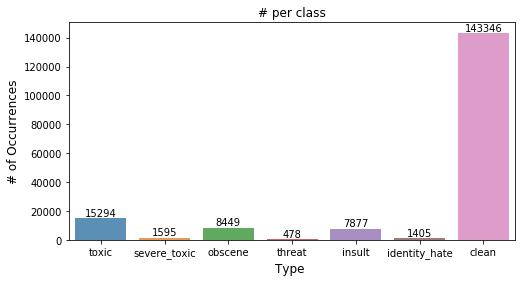

In [0]:
x=train.iloc[:,2:].sum()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("# per class")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('Type ', fontsize=12)
#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [0]:
print("total number of clean comments is,",train['clean'].sum(axis = 0),"as percentage is ",float((train['clean'].sum(axis = 0))/train.shape[0]*100), "%")


total number of clean comments is, 143346 as percentage is  89.83211235124176 %


In [0]:
train.isnull().any()

id               False
comment_text     False
toxic            False
severe_toxic     False
obscene          False
threat           False
insult           False
identity_hate    False
clean            False
dtype: bool

In [0]:
test.isnull().any()

id              False
comment_text    False
dtype: bool

Text Preprocessing

In [0]:
def text_preprocess(text): 
    
    # Emoticons
    text = text.replace(":/", " bad ")
    text = text.replace(":&gt;", " sad ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " frown ")
    text = text.replace(":(", " frown ")
    text = text.replace(":s", " frown ")
    text = text.replace(":-s", " frown ")
    text = text.replace("&lt;3", " heart ")
    text = text.replace(":d", " smile ")
    text = text.replace(":p", " smile ")
    text = text.replace(":dd", " smile ")
    text = text.replace("8)", " smile ")
    text = text.replace(":-)", " smile ")
    text = text.replace(":)", " smile ")
    text = text.replace(";)", " smile ")
    text = text.replace("(-:", " smile ")
    text = text.replace("(:", " smile ")
    text = text.replace(":/", " worry ")
    text = text.replace(":&gt;", " angry ")
    text = text.replace(":')", " sad ")
    text = text.replace(":-(", " sad ")
    text = text.replace(":(", " sad ")
    text = text.replace(":s", " sad ")
    text = text.replace(":-s", " sad ")
    text = text.replace("fu ck", "fuck")
    # Shortforms   
    text = re.sub(r'[\w]*don\'t[\w]*','do not',text)
    text = re.sub(r'[\w]*i\'ll[\w]*','i will',text)
    text = re.sub(r'[\w]*wasn\'t[\w]*','was not',text)
    text = re.sub(r'[\w]*there\'s[\w]*','there is',text)
    text = re.sub(r'[\w]*i\'m[\w]*','i am',text)
    text = re.sub(r'[\w]*won\'t[\w]*','will not',text)
    text = re.sub(r'[\w]*let\'s[\w]*','let us',text)
    text = re.sub(r'[\w]*i\'d[\w]*','i would',text)
    text = re.sub(r'[\w]*they\'re[\w]*','they are',text)
    text = re.sub(r'[\w]*haven\'t[\w]*','have not',text)
    text = re.sub(r'[\w]*that\'s[\w]*','that is',text)
    text = re.sub(r'[\w]*couldn\'t[\w]*','could not',text)
    text = re.sub(r'[\w]*aren\'t[\w]*','are not',text)
    text = re.sub(r'[\w]*wouldn\'t[\w]*','would not',text)
    text = re.sub(r'[\w]*you\'ve[\w]*','you have',text)
    text = re.sub(r'[\w]*you\'ll[\w]*','you will',text)
    text = re.sub(r'[\w]*what\'s[\w]*','what is',text)
    text = re.sub(r'[\w]*we\'re[\w]*','we are',text)
    text = re.sub(r'[\w]*doesn\'t[\w]*','does not',text)
    text = re.sub(r'[\w]*can\'t[\w]*','can not',text)
    text = re.sub(r'[\w]*shouldn\'t[\w]*','should not',text)
    text = re.sub(r'[\w]*didn\'t[\w]*','did not',text)
    text = re.sub(r'[\w]*here\'s[\w]*','here is',text)
    text = re.sub(r'[\w]*you\'d[\w]*','you would',text)
    text = re.sub(r'[\w]*he\'s[\w]*','he is',text)
    text = re.sub(r'[\w]*she\'s[\w]*','she is',text)
    text = re.sub(r'[\w]*weren\'t[\w]*','were not',text)
    
    
    # Remove punct except ! and ?
    text = re.sub(r"[,.:|(;@)-/^—#&%$<=>`~{}\[\]\'\"]+\ *", " ", text)
    # Separate out ! and ?
    text = re.sub("!", " ! ", text)
    text = re.sub("\?", " ? ", text)
  
    # Drop numbers
    text = re.sub("\\d+", " ", text)
        
    # Check if at least 3 consecutive substrings are in caps. Add <caps> tag at the end
    counter = 0
    for substr in text.split():
        if (substr.isupper() == True):
            counter += 1
            if counter >=3:
                text = text + " " + "XYZ" # XYZ chosen for capitals since it is a rare word present in embedding
                counter = 0
        else:
            if counter >=3:
                text = text + " " + "XYZ"
                counter = 0
            else:
                counter = 0
    
    # Convert to lower
    text = text.lower()
    
    # Lots of words are not present in the fasttext embeddings. Replace them
    text = re.sub(r'[\w]*(fuc|fck|fvc|fuk|fucd)[\w]*','fuck',text)
    text = re.sub(r'[\w]*fag[\w]*','gay',text)
    text = re.sub(r'[\w]*gay[\w]*','gay',text)
    text = re.sub(r'[\w]*peni[\w]*','dick',text)
    text = re.sub(r'[\w]*(dic|dik)[\w]*','dick',text)
    text = re.sub(r'[\w]*bi[\w]*ch[\w]*','bitch',text)
    text = re.sub(r'[\w]*s[\w]*x[\w]*','sex',text)
    text = re.sub(r'[\w]*s[\w]*k[\w]*','suck',text)
    text = re.sub(r'[\w]*nigg[\w]*','suck',text)
    text = re.sub(r'[\w]*cock[\w]*','dick',text)
    text = re.sub(r'[\w]*cunt[\w]*','cunt',text)
    text = re.sub(r'[\w]*anal[\w]*','anal',text)
    text = re.sub(r'[\w]*ha{2,}[\w]*','haha',text)
    text = re.sub(r'[\w]*haha[\w]*','haha',text)
    text = re.sub(r'[\w]*wiki[\w]*','wikipedia',text)
    text = re.sub(r'[\w]*ency[\w]ia[\w]*','encyclopedia',text)   
           
    # Remove unwanted space
    text = " ".join(text.split())

    return text

In [0]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won\'t", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)
    
    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

sent = decontracted(train['comment_text'].values[100])

In [0]:
print(sent)

However, the Moonlite edit noted by golden daph was me (on optus ...)  Wake up wikkis.  So funny


In [0]:
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)

In [0]:
print(sent)


However the Moonlite edit noted by golden daph was me on optus Wake up wikkis So funny


In [0]:
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

cleaning train data

In [0]:

clean_text_train = []
#s = re.compile(r'[^A-Za-z\.\-\?\!\,\#\@\% ]',re.IGNORECASE)
  
for i in train['comment_text'].values:
  sent = text_preprocess(i)
  sent = re.sub('[^A-Za-z0-9]+',' ', sent)
  
  sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
  clean_text_train.append(sent.lower().strip())

Cleaning test data

In [0]:
clean_text_test = []
for i in test['comment_text'].values:
  sent = text_preprocess(i)
  sent = re.sub('[^A-Za-z0-9]+',' ', sent)
  
 
  
  sent = ' '.join(e for e in sent.split() if e not in stopwords and len(e)>1)
  clean_text_test.append(sent.lower().strip())


'\nfor i in test[\'comment_text\'].values:\n  sent = decontracted(i)\n  sent = re.sub(\'[^A-Za-z0-9]+\', \' \', sent)\n  sent = re.sub(\'<[^<]+?>\', \'\', sent)\n  sent = re.sub(r"([0-9]+)000000", r"\x01m", sent)\n  sent = re.sub(r"([0-9]+)000", r"\x01k", sent)\n  sent = \' \'.join(e for e in sent.split() if e not in stopwords)\n  clean_text_test.append(sent.lower().strip())'

In [0]:
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test

In [0]:
#Tried to increase vocabulary of the model. Didn't work
'''def translate(comment, language):
    if hasattr(comment, "decode"):
        comment = comment.decode("utf-8")

    text = TextBlob(comment)
    try:
        text = text.translate(to=language)
        text = text.translate(to="en")
    except NotTranslated:
        pass

    return str(text)

def main():
    

    
    languages = ["es", "de", "fr"]
    
    comments_list = train["comment_text"].str.lower().fillna('something').values

    if not os.path.exists("/content/drive/My Drive/"):
        os.mkdir("/content/drive/My Drive/")

    parallel = Parallel(n_jobs = -1,backend="threading", verbose=5)
    for language in languages:
        print('Translate comments using "{0}" language'.format(language))
        translated_data = parallel(delayed(translate)(comment, language) for comment in comments_list)
        train["comment_text"] = translated_data

        result_path = os.path.join(args.result_path, "train_" + language + ".csv")
        train.to_csv(result_path, index=False)


if __name__ == "__main__":
    main()'''

Modeling on various embeddings

In [0]:
max_features = 100000
maxlen = 150
embed_size = 200
batch_size = 128
n_splits = 10

In [0]:
import time
start_time = time.time()
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import sys, os, re, csv, codecs, numpy as np, pandas as pd
np.random.seed(32)
os.environ["OMP_NUM_THREADS"] = "4"
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
os.environ['OMP_NUM_THREADS'] = '4'
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from keras.layers import GRU, BatchNormalization, Conv1D, MaxPooling1D
import warnings
warnings.filterwarnings('ignore')
from keras.callbacks import Callback


max_features = 272330
maxlen = 150
embed_size = 200
batch_size = 2048
n_splits = 4


# Classs for evaluating the metric
class RocAucEvaluation(Callback):
    def __init__(self, validation_data=(), interval=1):
        super(Callback, self).__init__()

        self.interval = interval
        self.X_val, self.y_val = validation_data

    def on_epoch_end(self, epoch, logs={}):
        if epoch % self.interval == 0:
            y_pred = self.model.predict(self.X_val, verbose=0)
            score = roc_auc_score(self.y_val, y_pred)
            print("\n ROC-AUC - epoch: {:d} - score: {:.6f}".format(epoch, score))
    

In [0]:
#Load embedding file, seperate train and test classes
EMBEDDING_FILE='/content/glove.twitter.27B.200d.txt'
train = pd.read_csv('/content/drive/My Drive/self2/train.csv')
test = pd.read_csv('/content/drive/My Drive/self2/test.csv')

list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
    
    
    
    
# load Clean text
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test


# Vectorize comments
list_sentences_train = train["comment_text"].str.lower().fillna("_na_").values
list_sentences_test = test["comment_text"].str.lower().fillna("_na_").values
    
tokenizer = Tokenizer(num_words = max_features, lower = True,filters='"#$%&()*+,-./:;=@[\\]^_`“<>{|}~\t\n') # not filtering out ! and ?, < >
# Fit on both train and test to take all the vocabulary
# People will question why take test. it is exposing to a wider vocabulary                      
tokenizer.fit_on_texts(list(list_sentences_train)+list(list_sentences_test))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
#padding the sequences to a maxlen of 150 per comment
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)
#Load word vector
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')    
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(EMBEDDING_FILE, encoding='utf-8'))
 

In [0]:
word_index = tokenizer.word_index
len(word_index)

272337

In [0]:
# creare embedding matrix
nb_words = min(max_features, len(word_index)) 
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    # we need to create a matrix for each word in the dataset - embedding matrix

In [0]:
# use stratified k folds to split data into train and test
# we are using stratified k folds in htis case because train_test_split won't work
folds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state=25)
oof = np.empty([len(X_t),len(list_classes)])
sub_preds = np.zeros([len(X_te),len(list_classes)])
foldwise_auc = [] 

In [0]:
from keras.layers import Conv1D, MaxPool1D, BatchNormalization, Concatenate

In [0]:
#ttps://www.kaggle.com/ogrellier/kfold-or-stratifiedkfold
#https://www.kaggle.com/christofhenkel/inceptioncnn-with-flip
#https://www.kaggle.com/c/quora-insincere-questions-classification/discussion/79911
# triain the model
for fold_, (trn_idx, val_idx) in enumerate(folds.split(y[:,0], y[:,0])): #StratifiedKFold expects array of shape (n,)
    filter_sizes = [1,2,3,5]
  
    X_train, y_train = X_t[trn_idx], y[trn_idx]
    X_val, y_val = X_t[val_idx], y[val_idx]
    num_filters = 36    
    print("Running fold %d" % fold_)     
        
    ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=1) 
        
    def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
        inp = Input(shape = (maxlen,))
        x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
        
        x = SpatialDropout1D(dr)(x)
        conv_0 = Conv1D(num_filters, kernel_size=(filter_sizes[0]),
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_1 = Conv1D(num_filters, kernel_size=(filter_sizes[1]),
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_2 = Conv1D(num_filters, kernel_size=(filter_sizes[2]), 
                                 kernel_initializer='he_normal', activation='elu')(x)
        conv_3 = Conv1D(num_filters, kernel_size=(filter_sizes[3]),
                                 kernel_initializer='he_normal', activation='elu')(x)

        maxpool_0 = MaxPool1D(pool_size=(maxlen - filter_sizes[0] + 1))(conv_0)
        maxpool_1 = MaxPool1D(pool_size=(maxlen - filter_sizes[1] + 1))(conv_1)
        maxpool_2 = MaxPool1D(pool_size=(maxlen - filter_sizes[2] + 1))(conv_2)
        maxpool_3 = MaxPool1D(pool_size=(maxlen - filter_sizes[3] + 1))(conv_3)

        z = Concatenate(axis=1)([maxpool_0, maxpool_1, maxpool_2, maxpool_3])   
        z = Flatten()(z)
        z = BatchNormalization()(z)
        outp = Dense(6, activation="sigmoid")(z)
        


        
            
        model = Model(inputs = inp, outputs = outp)
        model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
        model.fit(X_train, y_train, batch_size = 512, epochs = 4, validation_data = (X_val, y_val), 
                                verbose = 1, callbacks = [ra_val, earlystop])
            
        return model
                                         
    model = build_model(lr = 1e-3, lr_d = 0, units = 144, dr = 0.2)
        
    pred = model.predict(X_val, batch_size = 1024, verbose = 1)       
    #Save model after every epoch   
    filename = '/content/drive/My Drive/twitter_' + str(fold_) + '.h5'   
    model.save(filename)
    oof[val_idx] = pred
        
    sub_preds += model.predict([X_te], batch_size=1024, verbose=1) / n_splits
            
auc=0
for i in range(len(list_classes)):
    auc += roc_auc_score(y[:,i], oof[:,i]) / len(list_classes)
    
print("AUC for full run: %.6f" % auc)
    
validation = pd.DataFrame(oof, columns = list_classes)
validation.to_csv('validation_fasttext_bgrucnn.csv', index=False) 
    
submission = pd.concat([test['id'], pd.DataFrame(sub_preds, columns = list_classes)], axis=1)
submission.to_csv('submission_fasttext_bgrucnn.csv', index=False) 

Running fold 0
Train on 119678 samples, validate on 39893 samples
Epoch 1/4
119678/119678 [==============================] - 8s 66us/step - loss: 0.2991 - acc: 0.8788 - val_loss: 0.0673 - val_acc: 0.9800

 ROC-AUC - epoch: 0 - score: 0.945394
Epoch 2/4
119678/119678 [==============================] - 6s 54us/step - loss: 0.0606 - acc: 0.9804 - val_loss: 0.0540 - val_acc: 0.9813

 ROC-AUC - epoch: 1 - score: 0.968186
Epoch 3/4
119678/119678 [==============================] - 6s 54us/step - loss: 0.0513 - acc: 0.9815 - val_loss: 0.0509 - val_acc: 0.9814

 ROC-AUC - epoch: 2 - score: 0.975913
Epoch 4/4
119678/119678 [==============================] - 6s 54us/step - loss: 0.0475 - acc: 0.9824 - val_loss: 0.0500 - val_acc: 0.9814

 ROC-AUC - epoch: 3 - score: 0.977498
153164/153164 [==============================] - 2s 13us/step
Running fold 1
Train on 119678 samples, validate on 39893 samples
Epoch 1/4
119678/119678 [==============================] - 8s 66us/step - loss: 0.3007 - acc: 0.87

Second model

In [0]:
# same process as above but different word embedding vectors
EMBEDDING_FILE='/content/crawl-300d-2M.vec'
train = pd.read_csv('/content/drive/My Drive/self2/train.csv')
test = pd.read_csv('/content/drive/My Drive/self2/test.csv')
#misspellings = pd.read_csv('misspellings.csv')
    
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = train[list_classes].values
    
    
    
    
# Clean text
train['comment_text'] = clean_text_train
test['comment_text'] = clean_text_test


# Vectorize comments
list_sentences_train = train["comment_text"].str.lower().fillna("_na_").values
list_sentences_test = test["comment_text"].str.lower().fillna("_na_").values
    
tokenizer = Tokenizer(num_words = max_features, lower = True,filters='"#$%&()*+,-./:;=@[\\]^_`“<>{|}~\t\n') # not filtering out ! and ?, < >
# Fit on both train and test to take all the vocabulary
# People will question why take test. It may be worng but as far as the competition is concerned, it gives me a high score.                      
tokenizer.fit_on_texts(list(list_sentences_train)+list(list_sentences_test))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)
#padding the sequences to a maxlen of 150 per comment
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)


# Load word vector - Source : https://stackoverflow.com/questions/37793118/load-pretrained-glove-vectors-in-python  
def get_coefs(word,*arr): 
  return word, np.asarray(arr, dtype='float32')    
embedding_index = dict(get_coefs(*o.strip().split(" ")) for o in open(EMBEDDING_FILE, encoding='utf-8'))
 

In [0]:
word_index = tokenizer.word_index
len(word_index)

272337

In [0]:
#https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
nb_words = min(max_features, len(word_index)) 
embedding_matrix = np.zeros((nb_words, embed_size))
for word, i in word_index.items():
    if i >= max_features: continue
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None: embedding_matrix[i] = embedding_vector
    # we need to create a matrix for each word in the dataset - embedding matrix

In [0]:
folds = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state=25)
oof = np.empty([len(X_t),len(list_classes)])
sub_preds = np.zeros([len(X_te),len(list_classes)])
foldwise_auc = []   

In [0]:
#ttps://www.kaggle.com/ogrellier/kfold-or-stratifiedkfold
for fold_, (trn_idx, val_idx) in enumerate(folds.split(y[:,0], y[:,0])): #StratifiedKFold expects array of shape (n,)
        
    X_train, y_train = X_t[trn_idx], y[trn_idx]
    X_val, y_val = X_t[val_idx], y[val_idx]
        
    print("Running fold %d" % fold_)     
        
    ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=1) 
        
    def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
        inp = Input(shape = (maxlen,))
        x = Embedding(max_features, embed_size, weights = [embedding_matrix], trainable = False)(inp)
        
        x = SpatialDropout1D(0.4)(x)
        x = Bidirectional(GRU(units, return_sequences = True))(x)

        conv_0 = Conv1D(80, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
        conv_1 = Conv1D(80, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
        conv_2 = Conv1D(80, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)
        conv_3 = Conv1D(80, kernel_size = 3, padding = "valid", kernel_initializer = "he_uniform")(x)

        avg_0 = GlobalAveragePooling1D()(conv_0)
        maxpool_0 = GlobalMaxPooling1D()(conv_0)

        avg_1 = GlobalAveragePooling1D()(conv_1)
        maxpool_1 = GlobalMaxPooling1D()(conv_1)

        avg_2 = GlobalAveragePooling1D()(conv_2)
        maxpool_2 = GlobalMaxPooling1D()(conv_2)

        avg_3 = GlobalAveragePooling1D()(conv_3)
        maxpool_3 = GlobalMaxPooling1D()(conv_3)

        v0_col = concatenate([maxpool_0, maxpool_1, maxpool_2, maxpool_3])
        v1_col = concatenate([avg_1, avg_2, avg_0, avg_3])

        merged_tensor = concatenate([v0_col, v1_col])


        x = Dropout(0.5)(merged_tensor)
        x = Dense(144,activation='relu')(x)
        x = Dense(6, activation = "sigmoid")(x)
            
        model = Model(inputs = inp, outputs = x)
        model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
        model.fit(X_train, y_train, batch_size = 2048, epochs = 4, validation_data = (X_val, y_val), 
                                verbose = 1, callbacks = [ra_val, earlystop])
            
        return model
                                         
    model = build_model(lr = 1e-3, lr_d = 0, units = 144, dr = 0.2)
        
    pred = model.predict(X_val, batch_size = 1024, verbose = 1)          
    filename = '/content/drive/My Drive/fasttext_' + str(fold_) + '.h5'   
    model.save(filename)
    oof[val_idx] = pred
        
    sub_preds += model.predict([X_te], batch_size=1024, verbose=1) / n_splits
            
auc=0
for i in range(len(list_classes)):
    auc += roc_auc_score(y[:,i], oof[:,i]) / len(list_classes)
    
print("AUC for full run: %.6f" % auc)
    
validation = pd.DataFrame(oof, columns = list_classes)
validation.to_csv('validation_fasttext_bgrucnn.csv', index=False) 
    
submission = pd.concat([test['id'], pd.DataFrame(sub_preds, columns = list_classes)], axis=1)
submission.to_csv('submission_fasttext_bgrucnn.csv', index=False) 

Running fold 0
Train on 119678 samples, validate on 39893 samples
Epoch 1/4
119678/119678 [==============================] - 39s 322us/step - loss: 0.1254 - acc: 0.9589 - val_loss: 0.0573 - val_acc: 0.9789

 ROC-AUC - epoch: 0 - score: 0.963856
Epoch 2/4
119678/119678 [==============================] - 36s 299us/step - loss: 0.0574 - acc: 0.9794 - val_loss: 0.0503 - val_acc: 0.9811

 ROC-AUC - epoch: 1 - score: 0.973833
Epoch 3/4
119678/119678 [==============================] - 35s 297us/step - loss: 0.0528 - acc: 0.9806 - val_loss: 0.0483 - val_acc: 0.9818

 ROC-AUC - epoch: 2 - score: 0.976130
Epoch 4/4
119678/119678 [==============================] - 36s 297us/step - loss: 0.0507 - acc: 0.9811 - val_loss: 0.0476 - val_acc: 0.9817

 ROC-AUC - epoch: 3 - score: 0.977882
153164/153164 [==============================] - 24s 160us/step
Running fold 1
Train on 119678 samples, validate on 39893 samples
Epoch 1/4
119678/119678 [==============================] - 39s 324us/step - loss: 0.1203

Make a stacking emsemble of neural nets

In [0]:
import keras

In [0]:
keras.backend.clear_session()

In [0]:
dir_name = '/content/drive/My Drive/'
layer_name = ['twitter_3.h5','fasttext_3.h5']

In [0]:
#All of the code below has been inspired from https://machinelearningmastery.com/stacking-ensemble-for-deep-learning-neural-networks/
for i in layer_name:
  model = load_model(dir_name+i)
  f=0
  for layer in model.layers:
    layer.trainable = False
    layer.name = 'ensemble'+i+'_'+layer.name
    f+=1

In [0]:
all_models = []
for i in layer_name:
  model = load_model(dir_name+i)
  all_models.append(model)


In [0]:
ensemble_visible = [model.input for model in all_models]
ensemble_outputs = [model.output for model  in all_models]

In [0]:
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state=25)
oof = np.empty([len(X_t),len(list_classes)])
sub_preds = np.zeros([len(X_te),len(list_classes)])
foldwise_auc = [] 

In [0]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(y[:,0], y[:,0])): #StratifiedKFold expects array of shape (n,)
    if fold_ == 1:
      break   
    X_train, y_train = X_t[trn_idx], y[trn_idx]
    X_val, y_val = X_t[val_idx], y[val_idx]
        
    print("Running fold %d" % fold_)     
        
    ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=1) 
    def build_model(ensemble_outputs,ensemble_visible,lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
        merge = concatenate(ensemble_outputs)
        
        hidden = Dense(12, activation='relu')(merge)
        output = Dense(6, activation='sigmoid')(hidden)
        model = Model(inputs=ensemble_visible, outputs=output)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
        #model = Model(inputs = inp, outputs = x)
        #model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
        X = [X_train for _ in range(2)]
        
        X_v = [X_val for _ in range(2)]
        model.summary()
        model.fit([np.asarray(X_train),np.asarray(X_train)],y_train, batch_size = 2048, epochs = 1, validation_data = ([np.asarray(X_val),np.asarray(X_val)], y_val),verbose = 1, callbacks = [ra_val, earlystop])
            
        return model
                                         
    modelx = build_model(ensemble_outputs,ensemble_visible,lr = 1e-3, lr_d = 0, units = 144, dr = 0.2)
        
    pred = modelx.predict([X_val,X_val], batch_size = 1024, verbose = 1)          
        
    oof[val_idx] = pred
        
    sub_preds += modelx.predict([X_te,X_te], batch_size=1024, verbose=1) / n_splits
            
auc=0
for i in range(len(list_classes)):
    auc += roc_auc_score(y[:,i], oof[:,i]) / len(list_classes)
    
print("AUC for full run: %.6f" % auc)
    
validation = pd.DataFrame(oof, columns = list_classes)
validation.to_csv('Ensemble', index=False) 
    
submission = pd.concat([test['id'], pd.DataFrame(sub_preds, columns = list_classes)], axis=1)
submission.to_csv('sEnsemble_Submission', index=False) 

Running fold 0
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 150)          0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 150, 300)     81699000    input_7[0][0]                    
__________________________________________________________________________________________________
input_12 (InputLayer)           (None, 150)          0                                            
__________________________________________________________________________________________________
spatial_dropout1d_7 (SpatialDro (None, 150, 300)     0           embedding_7[0][0]                
_____________________________________________________________________________

ValueError: ignored

In [0]:
for fold_, (trn_idx, val_idx) in enumerate(folds.split(y[:,0], y[:,0])): #StratifiedKFold expects array of shape (n,)
        
    X_train, y_train = X_t[trn_idx], y[trn_idx]
    X_val, y_val = X_t[val_idx], y[val_idx]
        
    print("Running fold %d" % fold_)     
        
    ra_val = RocAucEvaluation(validation_data=(X_val, y_val), interval=1)
    earlystop = EarlyStopping(monitor='val_loss', mode="min", patience=5, verbose=1) 
        
    def build_model(lr = 0.0, lr_d = 0.0, units = 0, dr = 0.0):
        merge = concatenate(ensemble_outputs)
        hidden = Dense(10, activation='relu')(merge)
        output = Dense(6, activation='sigmoid')(hidden)
        model = Model(inputs=ensemble_visible, outputs=output)
        model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
            
        #model = Model(inputs = inp, outputs = x)
        #model.compile(loss = "binary_crossentropy", optimizer = Adam(lr = lr, decay = lr_d), metrics = ["accuracy"])
        X = [X_train for _ in range(len(model.input))]
        model.fit(X, y_train, batch_size = 128, epochs = 4, validation_data = (X_val, y_val),verbose = 1, callbacks = [ra_val, earlystop])
            
        return model
                                         
    model = build_model(lr = 1e-3, lr_d = 0, units = 144, dr = 0.2)
        
    pred = model.predict(X_val, batch_size = 1024, verbose = 1)          
        
    oof[val_idx] = pred
        
    sub_preds += model.predict([X_te], batch_size=1024, verbose=1) / n_splits
            
auc=0
for i in range(len(list_classes)):
    auc += roc_auc_score(y[:,i], oof[:,i]) / len(list_classes)
    
print("AUC for full run: %.6f" % auc)
    
validation = pd.DataFrame(oof, columns = list_classes)
validation.to_csv('ensemble.csv', index=False) 
    
submission = pd.concat([test['id'], pd.DataFrame(sub_preds, columns = list_classes)], axis=1)
submission.to_csv('ensemble_val.csv', index=False) 

Running fold 0


ValueError: ignored